# Linear Regression Project - Predicting CO2 Emission of Canadian cars 

#### Data set : https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Academia\Fahad's Projects\data sets\FuelConsumption.csv")

In [3]:
df.shape

(1067, 13)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df1 = df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']]
df1.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.0,8.5,4,196
1,2.4,9.6,4,221
2,1.5,5.9,4,136
3,3.5,11.1,6,255
4,3.5,10.6,6,244


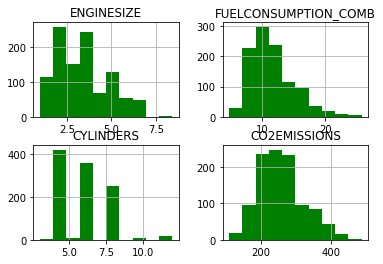

In [6]:
df1.hist(color = 'green')
plt.show()

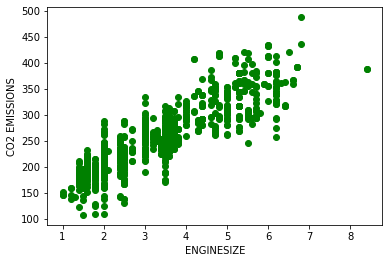

In [7]:
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS, color = 'green')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

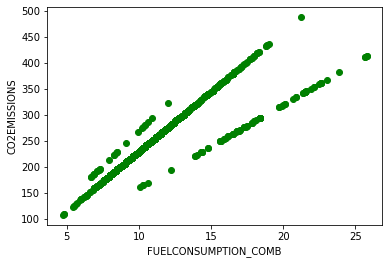

In [8]:
plt.scatter(df1.FUELCONSUMPTION_COMB, df1.CO2EMISSIONS, color = 'green')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

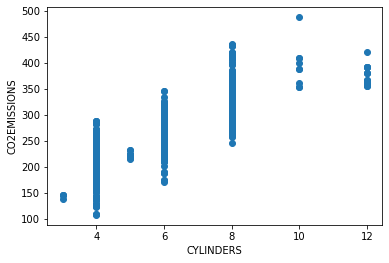

In [9]:
plt.scatter(df1.CYLINDERS, df1.CO2EMISSIONS)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [10]:
x = df1.drop('CO2EMISSIONS', axis = 'columns')
y = df1.CO2EMISSIONS 

In [11]:
x.head(10)

,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS
0,2.0,8.5,4
1,2.4,9.6,4
2,1.5,5.9,4
3,3.5,11.1,6
4,3.5,10.6,6
5,3.5,10.0,6
6,3.5,10.1,6
7,3.7,11.1,6
8,3.7,11.6,6
9,2.4,9.2,4


In [12]:
y.head(10)

0    196
1    221
2    136
3    255
4    244
5    230
6    232
7    255
8    267
9    212
Name: CO2EMISSIONS, dtype: int64

## Building Model

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 10)

In [14]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8736533692944298

#### The accuracy of this model is almost 87% 

### Making Predictions of CO2 Emissions based on ENGINESIZE, FUELCONSUMPTION_COMB and CYLINDERS

In [15]:
def predict_CO2Emission(ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS):    
    
    X = np.zeros(len(x.columns))
    X[0] = ENGINESIZE
    X[1] = FUELCONSUMPTION_COMB
    X[2] = CYLINDERS
    
    return lr_clf.predict([X])[0]

In [16]:
predict_CO2Emission(2, 8.5, 4)

198.4794034318778

In [17]:
predict_CO2Emission(3.7, 11.1, 6)

257.1585864458158